# Using XGBoost to generate prediction models and find relevant features
This notebook uses the XGBoost algorithm in combination with the SHAP library in attempt to generate accurate predictions and to find useful features to reduce dimensionality for our downstream models.

### This custom class (stored in scripts) will handle the OHLCV pandas dataframe+indicators, create a prediction df, normalize, and optionally plot residuals and/or feature importances  
 

In [1]:
import sys
sys.path.append('../../scripts')

from xgboost_for_tickers import TickerXGBRegressor
import pandas as pd

ModuleNotFoundError: No module named 'xgboost_for_tickers'

## Analysis: Feature Importance  


### Example using MSFT data:

normilization_type: log_return 
target: high 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: 0.06745667410647094
Train Score: 0.17529094644691545

Best TEST R^2 is 0.06745667410647094 with params: {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}
TRAIN R^2 for best test params is 0.17529094644691545


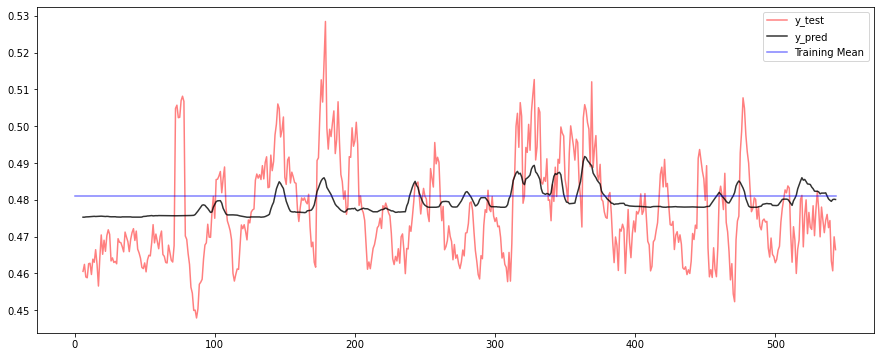

Final Holdout Error metrics saved: R^2: 0.0362. MAPE Unnormalized:0.9938%
GENERATING FEATURE IMPORTANCES...


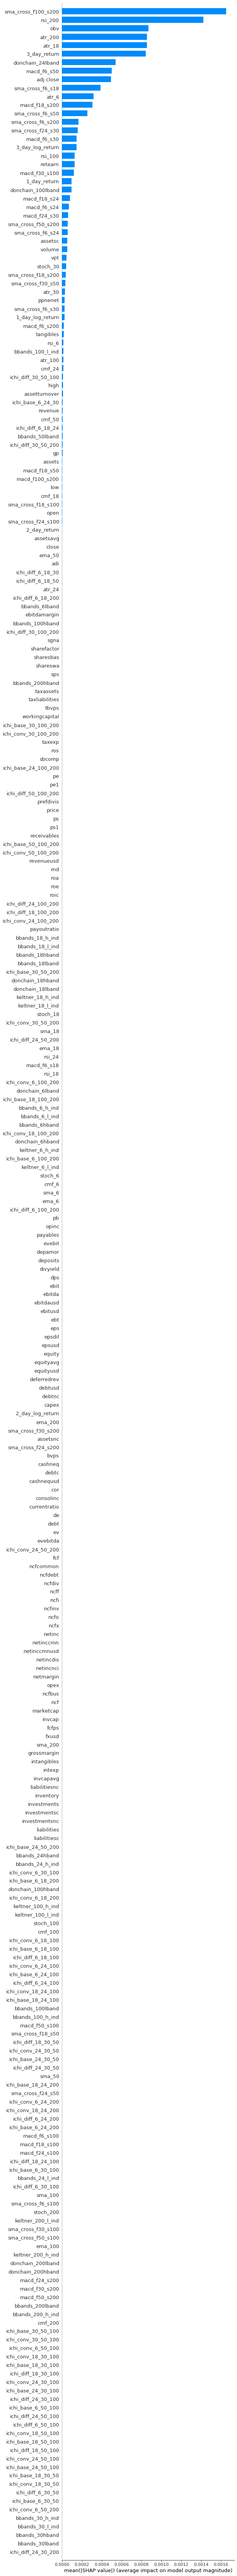

In [4]:
# def preprocess(data):
#     # keep feature data only
#     data = data.iloc[:, 7:]
#     data.columns = [c.lower() for c in data.columns]
#     return data

# ticker = 'MSFT'
# df = pd.read_csv(f'../../data/ticker_data/{ticker}_full_data.csv')
# df= preprocess(df)

# modler = TickerXGBRegressor(df.copy())
# modler.predict_with_xgb(target='high', gsearch_params={
# 'max_depth': [2], 'learning_rate': [0.005], 'colsample_bytree': [0.75], 
# 'n_estimators': [500], 'objective': ['reg:squarederror'], 'gamma':[0]},
# normilization_type='log_return', test_size=0.2, timeframe=-1, scale_type='minmax')

# Paramater search for all tickers: Return on Close to next day High 
80% Train, 10% Validation, 10% Test (Labeled "Holdout Set" in code).   
Predict on log return of Close to next day high (potential exit point prediction), final predictions converted back to High price before calculating error metrics.  
Final metrics calculated and saved: MAPE, MAE, RMSE.

In [235]:
ticker_names = ['MSFT', 'HD', 'UNH', 'XOM', 'ADSK', 'WAT']

In [236]:
from os import listdir
listdir('../../data/ticker_data')

['ADSK_full_data.csv',
 'AMAT_full_data.csv',
 'CARR_full_data.csv',
 'HD_full_data.csv',
 'JNJ_full_data.csv',
 'MSFT_full_data.csv',
 'MTD_full_data.csv',
 'UNH_full_data.csv',
 'V_full_data.csv',
 'WAT_full_data.csv',
 'WFC_full_data.csv',
 'XOM_full_data.csv']

In [237]:
ticker_model_dict = {'ticker_data':[], 'models':[]}
for data_name in ['MSFT', 'HD', 'UNH', 'XOM', 'ADSK', 'WAT']:
    ticker_model_dict['ticker_data'].append(preprocess(pd.read_csv(f'../../data/ticker_data/{data_name}_full_data.csv')))

normilization_type: log_return 
target: high 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.2924684596421159
Train Score: -0.0750617123594608

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.13371687609576877
Train Score: 0.00947395725706246

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.06050928510705256
Train Score: 0.054478179181571496

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.2814347245307611
Train Score: -0.06346991915840916

Testing {'colsample_bytree':

Test Score: 0.028282349182070177
Train Score: 0.1232285984184801

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.04073501605735608
Train Score: 0.08948974804662002

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: 0.02327623398768186
Train Score: 0.13753578479814677

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.02764398566206483
Train Score: 0.142467834425121

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.039518731262755624
Train Score: 0.10271051572258738

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 4, '

Test Score: 0.016415628431745044
Train Score: 0.08235179975669926

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: 0.004661422195101572
Train Score: 0.07488338375954973

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: 0.017325327127487467
Train Score: 0.08250046586472792

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.017652417178287916
Train Score: 0.08476446201720056

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.29195296911234636
Train Score: -0.07466964833410916

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, '

Test Score: -0.08581875798417471
Train Score: 0.07049021378025089

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.037935070028862095
Train Score: 0.07965396995243745

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: 0.026168980600630776
Train Score: 0.1231178845780847

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.02771391505185483
Train Score: 0.12410801751576439

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.04171489719423027
Train Score: 0.09174863613857509

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_dept

Test Score: 0.013457796521423648
Train Score: 0.07190563031643216

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: 0.005486871673891058
Train Score: 0.07468817826487617

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: 0.015603883356821835
Train Score: 0.07760597648983825

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.01583675670158402
Train Score: 0.07761297616733531

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: 0.005486871673891058
Train Score: 0.07468817826487617

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4

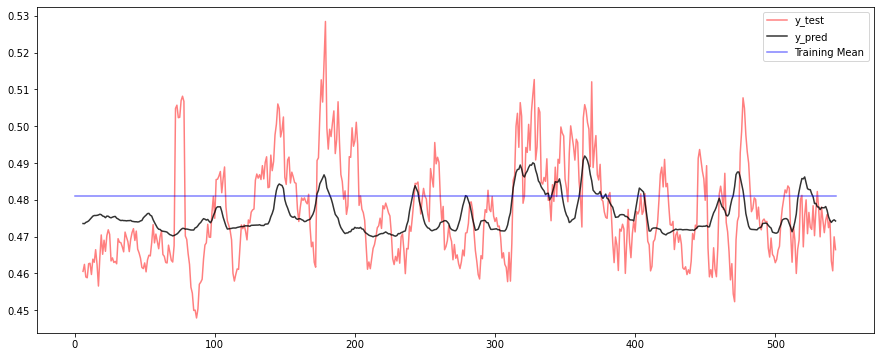

Final Holdout Error metrics saved: R^2: 0.0392. MAPE Unnormalized:0.9705%
GENERATING FEATURE IMPORTANCES...


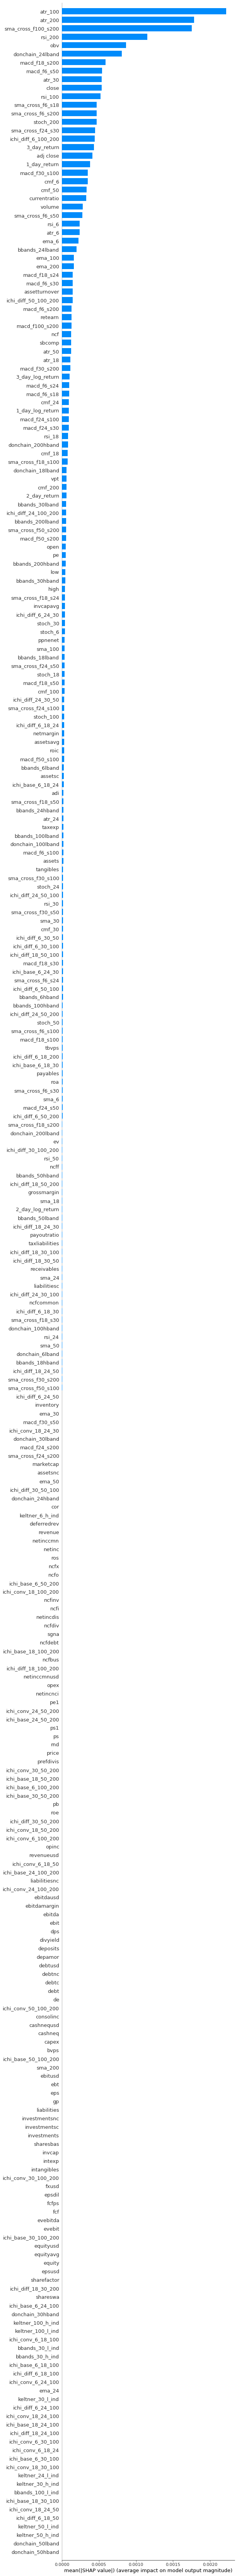

normilization_type: log_return 
target: high 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -39.83224173421113
Train Score: -13.692783627232942

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -21.522654842584682
Train Score: -7.458231034519212

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -12.849843867297045
Train Score: -4.467591108513835

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -40.35979404473659
Train Score: -13.681152923578328

Testing {'colsample_bytree': 0.5, 'g

Test Score: 0.046082663463862694
Train Score: 0.11510295622679956

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -7.573241599592462
Train Score: -2.637802540944783

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.16690311925409929
Train Score: 0.005382393290414789

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.04482839472476163
Train Score: 0.13213024404529683

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -7.570872274703577
Train Score: -2.6188023038379207

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 4, 'n

Test Score: -0.036312628156325744
Train Score: 0.08237071299759535

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.6602127425525266
Train Score: -0.28023523225390523

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.011433842666629168
Train Score: 0.08754868634699253

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.033394762857689164
Train Score: 0.08843001408824192

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -39.883700676507765
Train Score: -13.692710409902222

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 

Test Score: -7.551727935440043
Train Score: -2.65430989976796

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.160243036067941
Train Score: -0.0096350306059938

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.04639848347103237
Train Score: 0.11701785893222705

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -7.591096547482007
Train Score: -2.633516661838511

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.17351104904430015
Train Score: 0.009886444037103148

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, '

Test Score: -0.6600523070072788
Train Score: -0.2888185541708368

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.011264466491727854
Train Score: 0.07896189534124531

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.03321370221947739
Train Score: 0.07984303860201625

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.6674907852966265
Train Score: -0.28365487683343105

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.00991721944242463
Train Score: 0.08412517192920854

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 

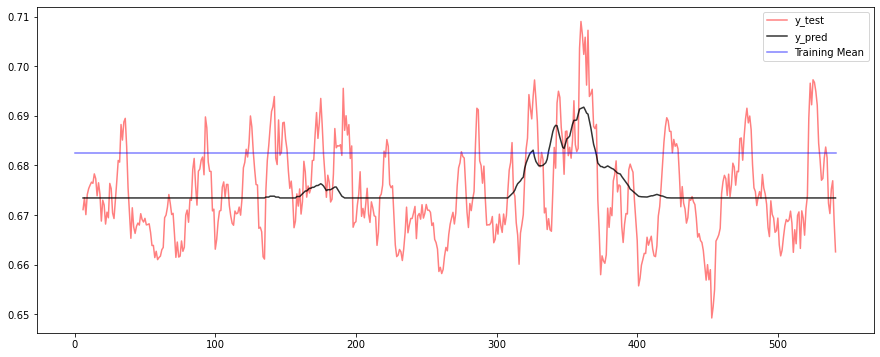

Final Holdout Error metrics saved: R^2: 0.0432. MAPE Unnormalized:0.9264%
GENERATING FEATURE IMPORTANCES...


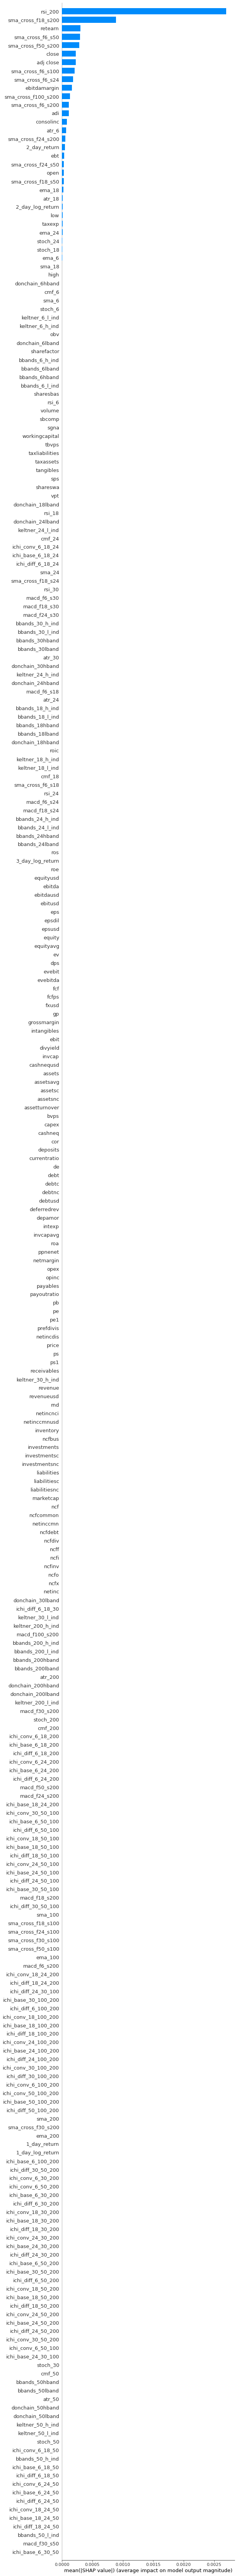

normilization_type: log_return 
target: high 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -57.44621845059084
Train Score: -21.753397734342673

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -31.704231718944072
Train Score: -11.854412868011412

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -19.37353014677049
Train Score: -7.107662021100193

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -57.39978067959358
Train Score: -21.738186705038085

Testing {'colsample_bytree': 0.5, 'g

Test Score: -0.1144698145369647
Train Score: 0.17042255597871814

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -11.927107038650577
Train Score: -4.1996751745770835

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.7628713516308021
Train Score: -0.014171830732954804

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.11634173486618349
Train Score: 0.18610292605502843

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -11.924226275753124
Train Score: -4.1955706394003025

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 4,

Test Score: -0.03853309915871628
Train Score: 0.14166391975178483

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.9681644929050632
Train Score: -0.4468803552302465

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.06316601097812824
Train Score: 0.13979484085104454

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.037687139730457675
Train Score: 0.1411932892353277

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -57.44570169359013
Train Score: -21.752152534133195

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_es

Test Score: -11.965947820163576
Train Score: -4.220146391914806

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.7686448922363045
Train Score: -0.03163918862423287

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.11963476128546024
Train Score: 0.16810178948111387

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -11.919972099113243
Train Score: -4.19672514416075

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.7721888381043578
Train Score: -0.015857745646761012

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth':

Test Score: -1.9899786067886418
Train Score: -0.45165494616033697

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.07226806708085753
Train Score: 0.13141914775970742

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.045686511072575264
Train Score: 0.1328179464382836

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.994755615854109
Train Score: -0.45169983115802514

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.07015920740241244
Train Score: 0.13264682158383745

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4

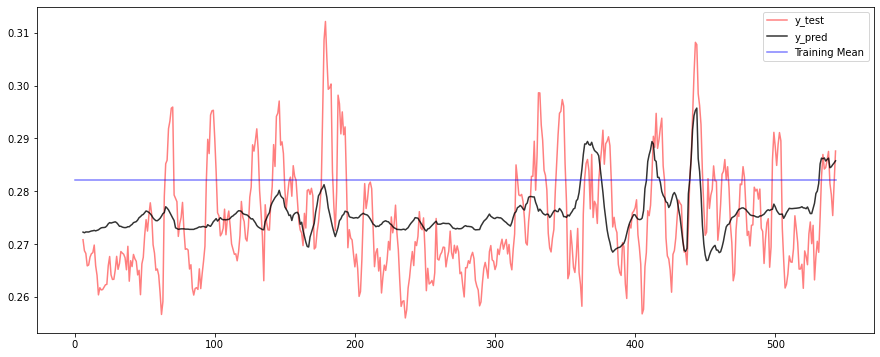

Final Holdout Error metrics saved: R^2: 0.0971. MAPE Unnormalized:1.0682%
GENERATING FEATURE IMPORTANCES...


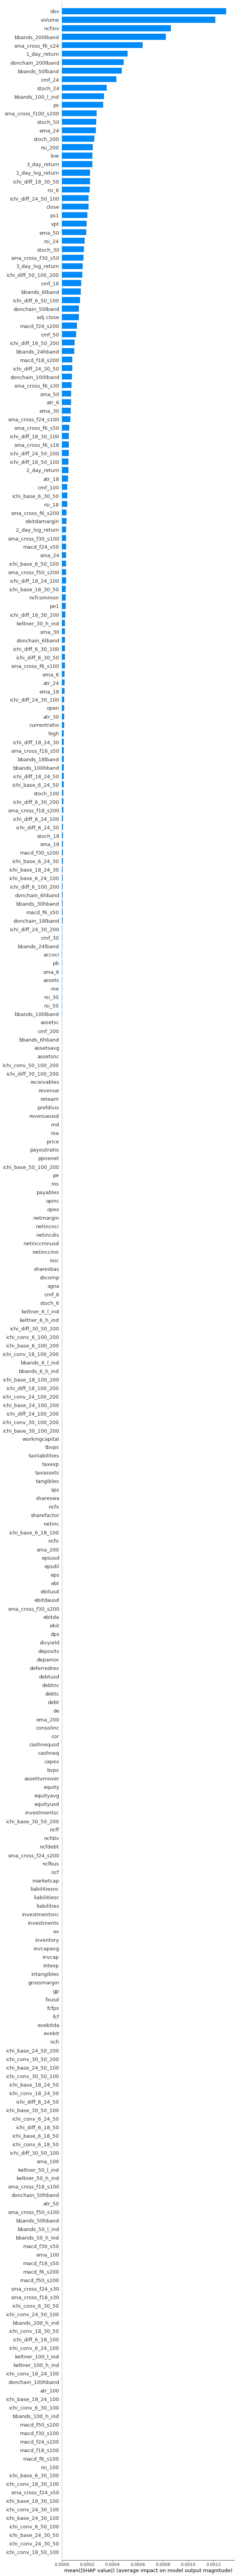

normilization_type: log_return 
target: high 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -16.126051340101167
Train Score: -8.791537382648324

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -9.05021710330926
Train Score: -4.747133486363785

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -5.591780181186917
Train Score: -2.8019352847183496

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -15.992795088164385
Train Score: -8.775480837955675

Testing {'colsample_bytree': 0.5, 'gam

Test Score: -0.019230187088975725
Train Score: 0.2274428760627334

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -3.40732411661628
Train Score: -1.57717389781117

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.22877864164049755
Train Score: 0.16245284037610452

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.02178740250915867
Train Score: 0.24555531888484727

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -3.3971961746046677
Train Score: -1.5678348040213272

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 4, 'n_

Test Score: -0.006255569482258805
Train Score: 0.18213312076342214

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.6397717834585515
Train Score: -0.0647538288794387

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.020288910070103583
Train Score: 0.18046017254138746

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.00704336419714835
Train Score: 0.18289701694905958

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -16.117766172713367
Train Score: -8.791804845819277

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_

Test Score: -3.450896957362785
Train Score: -1.6051460285592971

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.23121361663707596
Train Score: 0.14524655748255644

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.019472492144401388
Train Score: 0.22756892508987647

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -3.381687074344468
Train Score: -1.5743010107288695

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.23319197852331097
Train Score: 0.15661326222842198

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth'

Test Score: -0.6439715249037501
Train Score: -0.06829668759603535

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.027235030209455502
Train Score: 0.1708194217019504

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.015319362019598604
Train Score: 0.17138608350707552

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.6451428077205876
Train Score: -0.06644024380317304

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.027492612369732994
Train Score: 0.17272330868701924

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth'

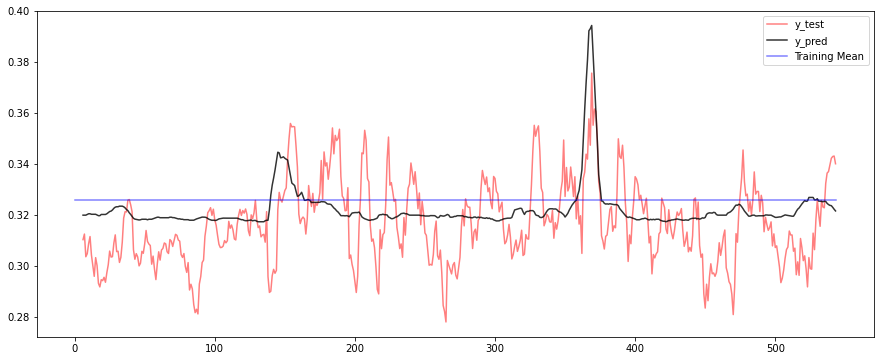

Final Holdout Error metrics saved: R^2: 0.0461. MAPE Unnormalized:1.4207%
GENERATING FEATURE IMPORTANCES...


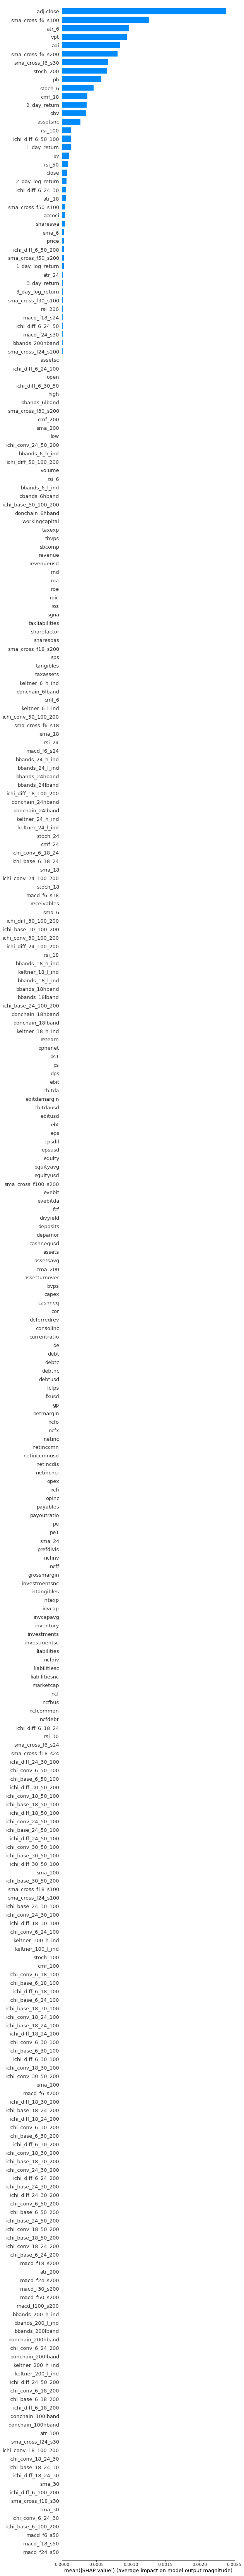

normilization_type: log_return 
target: high 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.6363162817592287
Train Score: -0.8947295968966331

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.909431229341495
Train Score: -0.4523636104227349

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.5624099187185649
Train Score: -0.23656943547463993

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.6609623092647618
Train Score: -0.8843600917417984

Testing {'colsample_bytree': 0.5

Test Score: 0.006631509393991597
Train Score: 0.09829363205926023

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.29379907574786457
Train Score: -0.09135657741790015

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.004875304286507065
Train Score: 0.10476196867324361

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.013402538007146303
Train Score: 0.11758494246810403

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.2946535279183622
Train Score: -0.08553056963813388

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth'

Test Score: -0.0004021725921090624
Train Score: 0.0530577329977282

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.05764045603012713
Train Score: 0.028423527929840264

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.0014772072421420646
Train Score: 0.052998899051936

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.0004021725921090624
Train Score: 0.0530577329977282

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.605344566395917
Train Score: -0.8943831163750506

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, '

Test Score: -0.4955837316684204
Train Score: -0.21793745113550034

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.2993646944830881
Train Score: -0.10338635465996582

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.007830273611403982
Train Score: 0.08955738006482883

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.006958335446771269
Train Score: 0.09812421455280984

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.2912956907018365
Train Score: -0.08758510783269635

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_de

Test Score: -0.00036392058349110634
Train Score: 0.05275977233595819

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.05731316024981847
Train Score: 0.028032331880186168

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.0013747730639299682
Train Score: 0.052606734997753146

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.00031027867106359075
Train Score: 0.05266551607115255

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.05731316024981847
Train Score: 0.028032331880186168

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'm

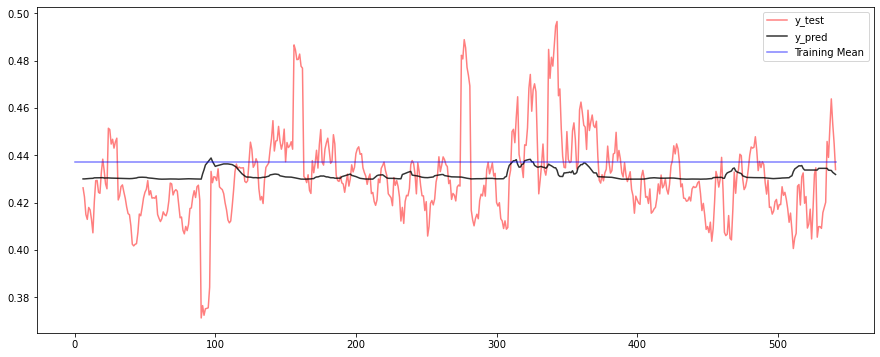

Final Holdout Error metrics saved: R^2: 0.0363. MAPE Unnormalized:1.2616%
GENERATING FEATURE IMPORTANCES...


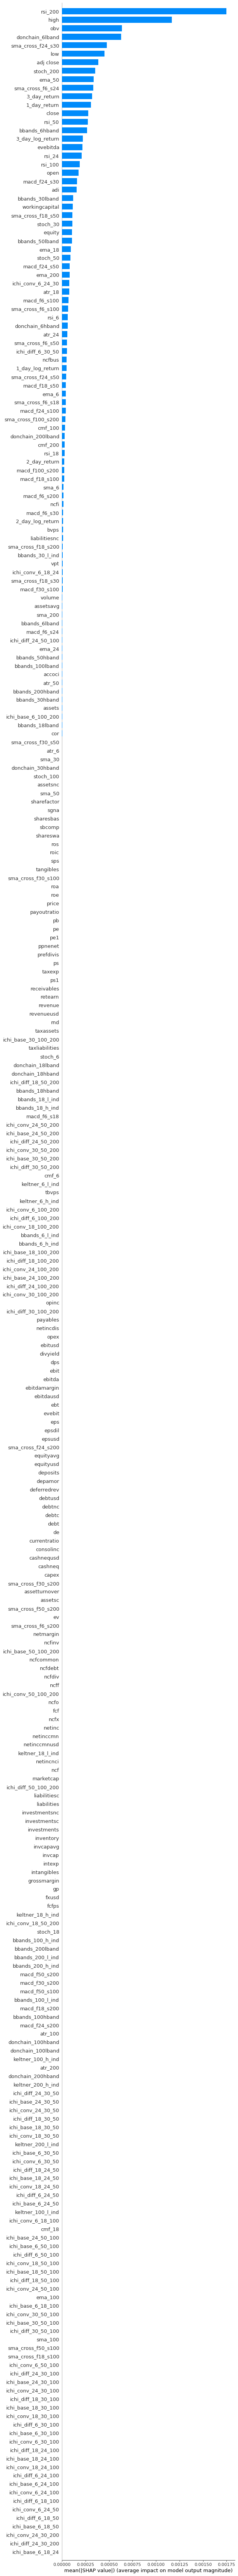

normilization_type: log_return 
target: high 1 day shifted
START: Model is selected and saved to object based on best test score. 

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -7.2998398988796485
Train Score: -3.4377601904470323

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -3.9022482132222507
Train Score: -1.8372345422800471

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -2.2734280043971853
Train Score: -1.0667092159926672

Testing {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -7.557296286831763
Train Score: -3.424499269452765

Testing {'colsample_bytree': 0.5, 

Test Score: 0.006139198101383192
Train Score: 0.09420432441338034

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.3085792726402543
Train Score: -0.5936208428420535

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.0032686089273019636
Train Score: 0.07852537341994892

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.007395817644884395
Train Score: 0.11060209270270138

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.3149294576058743
Train Score: -0.5864390793716405

Testing {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 

Test Score: -0.038013338491964976
Train Score: 0.06580632421779153

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.0720426850495397
Train Score: -0.02558296255639836

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.028009118404494604
Train Score: 0.07238274564567493

Testing {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.036329703008888714
Train Score: 0.07260522686175941

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -7.295979881380447
Train Score: -3.437292509465337

Testing {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'n

Test Score: -1.3031676547676372
Train Score: -0.6098916893891815

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.007542908887477218
Train Score: 0.06183081746836627

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: 0.001313823661852065
Train Score: 0.09390983977854095

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -1.309231377070875
Train Score: -0.5921963270579744

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.007270945284709285
Train Score: 0.07919589386883696

Testing {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.005, 'max_dept

Test Score: -0.0721908407770937
Train Score: -0.02861676570465277

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.02994196323799536
Train Score: 0.06421648745577613

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'objective': 'reg:squarederror'}...
Test Score: -0.03842106221399444
Train Score: 0.06443946112415477

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}...
Test Score: -0.07210716752758395
Train Score: -0.023130445334776928

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'objective': 'reg:squarederror'}...
Test Score: -0.02891050646503146
Train Score: 0.07415142249074758

Testing {'colsample_bytree': 0.75, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth'

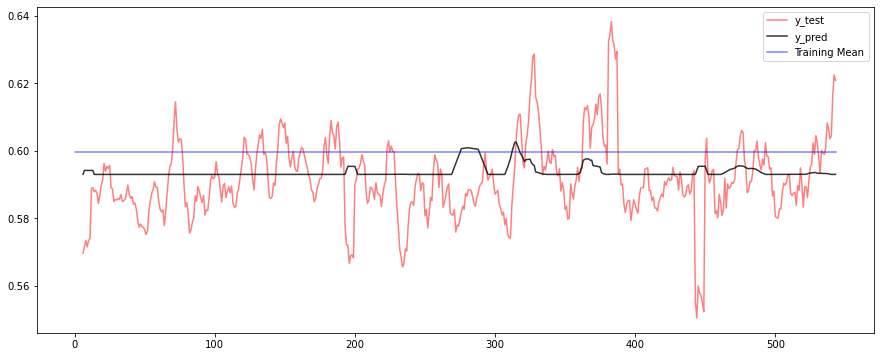

Final Holdout Error metrics saved: R^2: 0.0204. MAPE Unnormalized:0.979%
GENERATING FEATURE IMPORTANCES...


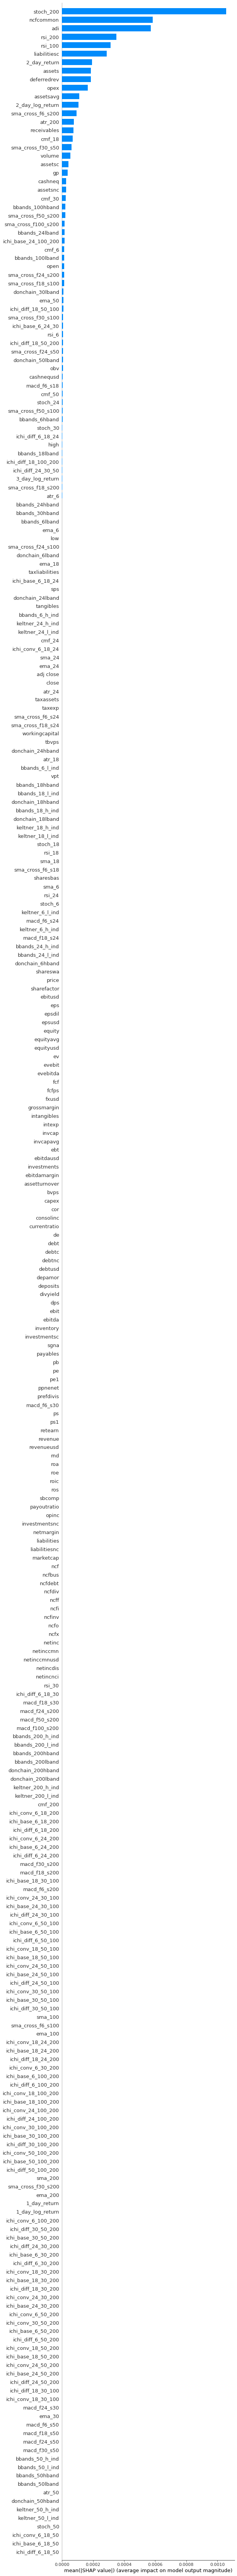

In [238]:
for df in ticker_model_dict['ticker_data']:
    modler = TickerXGBRegressor(df.copy())
    modler.predict_with_xgb(target='high', gsearch_params={
    'max_depth': [2,3,4], 'learning_rate': [0.001, 0.005, 0.01], 'colsample_bytree': [0.5, 0.75], 
    'n_estimators': [200, 500, 750], 'objective': ['reg:squarederror'], 'gamma':[0, 0.1, 0.2]},
    normilization_type='log_return', test_size=0.2, timeframe=-1, scale_type='minmax')
    
    ticker_model_dict['models'].append(modler)

In [321]:
def extract_important_features(model_object, ticker_names, output_path, max_feature_length):
    """Extract SHAP important features and save to csv"""
    for i in range(len(ticker_names)):
        importances_dict = model_object[i].feature_importance_dict
        important_features = []
        for key, val in importances_dict.items():
            if val <= 0 or len(important_features) > max_feature_length:
                break  
            important_features.append(key)
        df = model_object[i].df.copy()
        df[important_features].to_csv(f"{output_path + ticker_names[i]}_reduced{max_feature_length}.csv")

In [322]:
output_path = "../../data/ticker_data/"
extract_important_features(ticker_model_dict['models'],ticker_names, output_path=output_path, max_feature_length=50)